
## Jupyter Notebooks

This document is a Jupyter Notebook, a document that supports both code and rich text elements (paragraphs, equations, figures, links, etc...). It is a powerful tool for interactively developing and presenting data science projects.

When you write in a Jupyter Notebook, you are creating a document that contains live code, equations, visualizations, and narrative text. This notebook is written in Python, but Jupyter Notebooks also support Julia, R, and other programming languages.

### How to use a Jupyter - everything is a cell

#### Shortcuts

* `Shift + Enter` run the current selected cell or insert below a new cell
* `Ctrl + Enter` run selected cells
* `Alt + Enter` run the current cell, insert below
* `Ctrl + S` save and checkpoint
* `Tab` code completion or indent
* `Shift + Tab` tooltip
* `Ctrl + Shift + -` split cell
* `Ctrl + /` comment
* `Ctrl + Shift + P` open the command palette
* `Up` select cell above
* `Down` select cell below
* `A` insert cell above
* `B` insert cell below
* `C` copy cell
* `V` paste cell
* `D, D` delete selected cell
* `Z` undo last cell deletion
* `Y` change cell to code
* `M` change cell to markdown
* `S` save and checkpoint
* `F` find and replace
* `Shift + Arrow` select multiple cells
* `Shift + M` merge selected cells
* `L` toggle line numbers
* `O` toggle output
* `Shift + O` toggle output scrolling
* `Esc` close pager
* `Q` close pager
* `H` show keyboard shortcuts
* `I, I` interrupt kernel
* `0, 0` restart kernel

#### Types of cells

* `Code cells`: contain code to be executed by the kernel
* `Markdown cells`: contain text formatted using Markdown and LaTeX
* `Raw cells`: contain unformatted text that is included, without modification, when notebooks are converted to different formats using nbconvert (e.g. HTML) 
* `Heading cells`: contain the title of the notebook and the table of contents
* `Output cells`: contain the output of the code that was run in the code cells
* `Error cells`: contain the error messages that are generated when the code cells are run and an error occurs 

In [25]:
# This is a comment in a cell.

In [26]:
print("Hello, world!")

Hello, world!


In [27]:
n = 5
print(n + 5)

10


### How to use a Jupyter - working with code

Jupyter Notebooks are a great tool for data analysis and data science projects. You can write and execute code, save and share your results, and create interactive visualizations.
We are going to import a few well-known libraries like `numpy` and `matplotlib` to work with data and create visualizations.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

Let´s now execute a few lines of code to see how it works.

In [29]:
x = np.linspace(0, 10, 100)
y = np.cumsum(np.random.randn(100, 6), axis=0) # Generate some data for plotting 

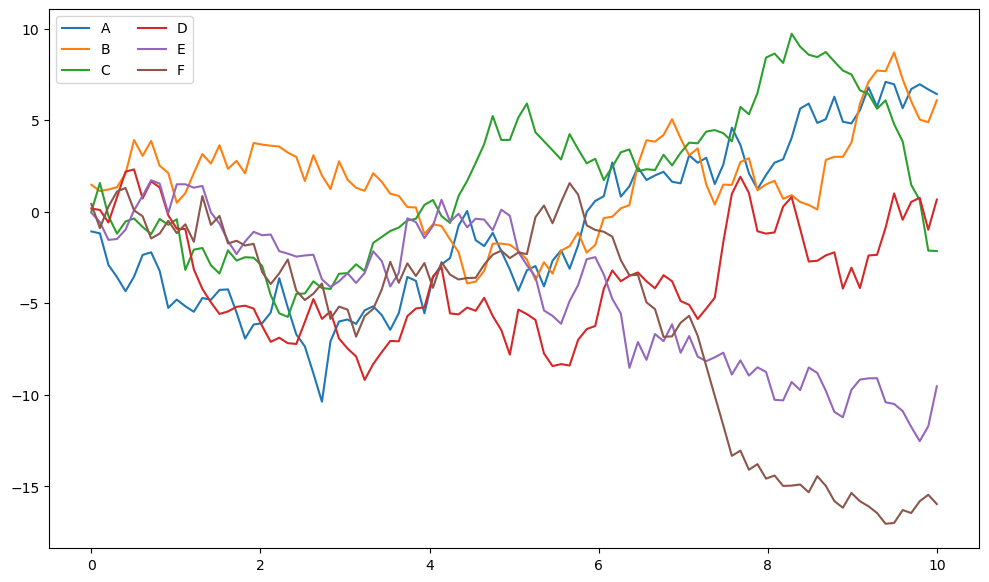

In [30]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

### How to use a Jupyter - Interacting with data

Notebooks.ai and Jupyter Lab make it really simple to interact with files in your local storage. These files are securely stored in the cloud and you can access them from anywhere in the world.

To show you the full potential of Notebooks.ai we´re going to pull cryptocurrencies prices from a public API and download them as Excel files. We need to import two libraries first: `requests` to make the API call and `pandas` to work with the data.


In [31]:
import requests
import pandas as pd

I have predifined a function `get_historic_price` that simplifies the process of importing data from the [Kraken](https://blog.kraken.com/product/cryptowatch-to-sunset-kraken-pro-to-integrate-cryptowatch-features#) API (for reference, check their [docs](https://docs.kraken.com/api/) ).

In [32]:
def get_historic_price(symbol, after="2018-09-01"):

    url = "https://api.kraken.com/0/public/OHLC" # baseURL endpoint for Kraken API
    pair = f"{symbol.upper()}USD"  # XBTUSD when symbol='xbt' for example

    resp = requests.get(
        url,
        params={
            "pair": pair,
            "interval": 60,
            "since": str(int(pd.Timestamp(after).timestamp())),
        },
    )
    resp.raise_for_status() # Raise an exception if the status code is not 200

    data = resp.json() # Parsing the JSON from the response

    results_key = [k for k in data["result"].keys() if k != "last"][0] # Get the key of the results from the JSON response
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count) in data["result"][
            results_key
        ]
    ]
    df = pd.DataFrame(
        results,
        columns=[
            "CloseTime",
            "OpenPrice",
            "HighPrice",
            "LowPrice",
            "ClosePrice",
            "Volume",
        ],
    )
    df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")
    df.set_index("CloseTime", inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [33]:
last_week = pd.Timestamp.now() - pd.offsets.Day(7)
last_week

Timestamp('2025-03-18 17:12:15.066012')

In [34]:
btc = get_historic_price("btc", after=last_week) # Get the historic price of Bitcoin

In [35]:
eth = get_historic_price("eth", after=last_week) # Get the historic price of Ethereum

##### Bitcoin:

In [36]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-03-18 18:00:00,81473.9,81918.3,81256.1,81822.0,60.393824
2025-03-18 19:00:00,81822.1,82454.9,81765.1,82262.6,83.007034
2025-03-18 20:00:00,82301.8,82330.9,81900.0,81999.9,30.671027
2025-03-18 21:00:00,82000.0,82173.2,81926.8,82003.7,17.829437
2025-03-18 22:00:00,82003.7,82500.0,81992.6,82424.6,36.669927


In [37]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2025-03-18 18:00:00 to 2025-03-25 17:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   168 non-null    float64
 1   HighPrice   168 non-null    float64
 2   LowPrice    168 non-null    float64
 3   ClosePrice  168 non-null    float64
 4   Volume      168 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


We get the plot graph of the last 7 days of Bitcoin prices.

<Axes: xlabel='CloseTime'>

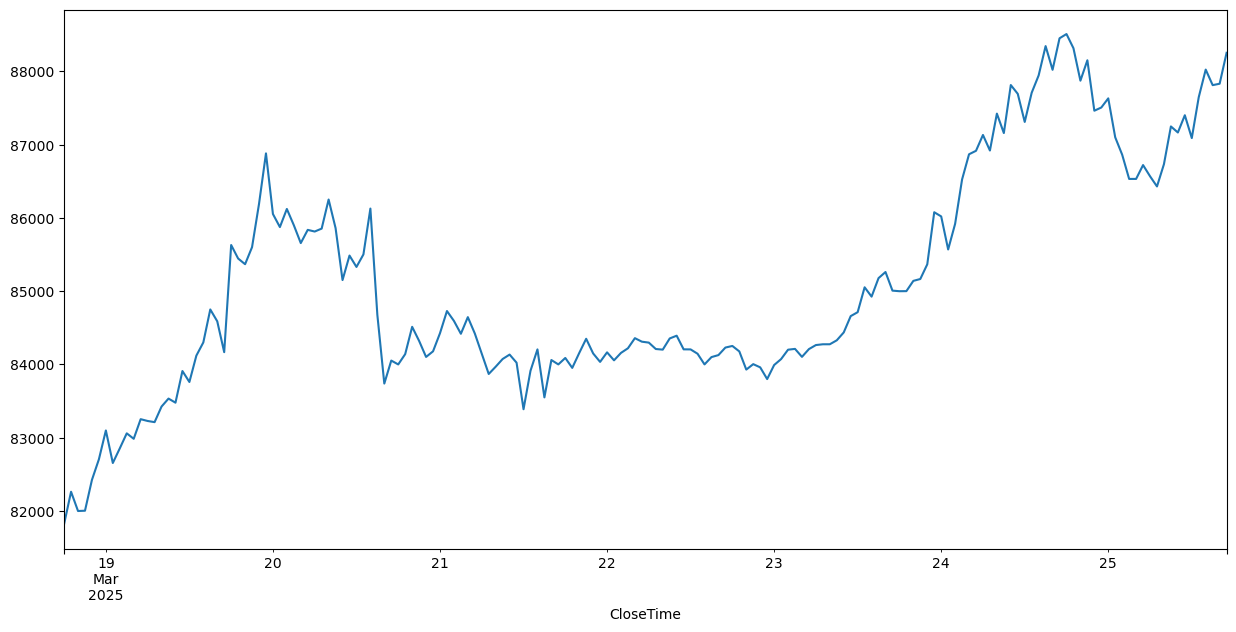

In [38]:
btc["ClosePrice"].plot(figsize=(15, 7))

##### Ether:

In [39]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-03-18 18:00:00,1876.05,1890.93,1874.00,1888.74,355.347776
2025-03-18 19:00:00,1888.74,1907.67,1888.02,1903.80,192.804989
2025-03-18 20:00:00,1903.82,1908.70,1898.29,1904.56,387.390842
2025-03-18 21:00:00,1904.79,1914.20,1904.79,1910.50,1363.996319
2025-03-18 22:00:00,1910.50,1918.99,1908.76,1917.28,386.354418


We get the plot graph of the last 7 days of Ether prices.

<Axes: xlabel='CloseTime'>

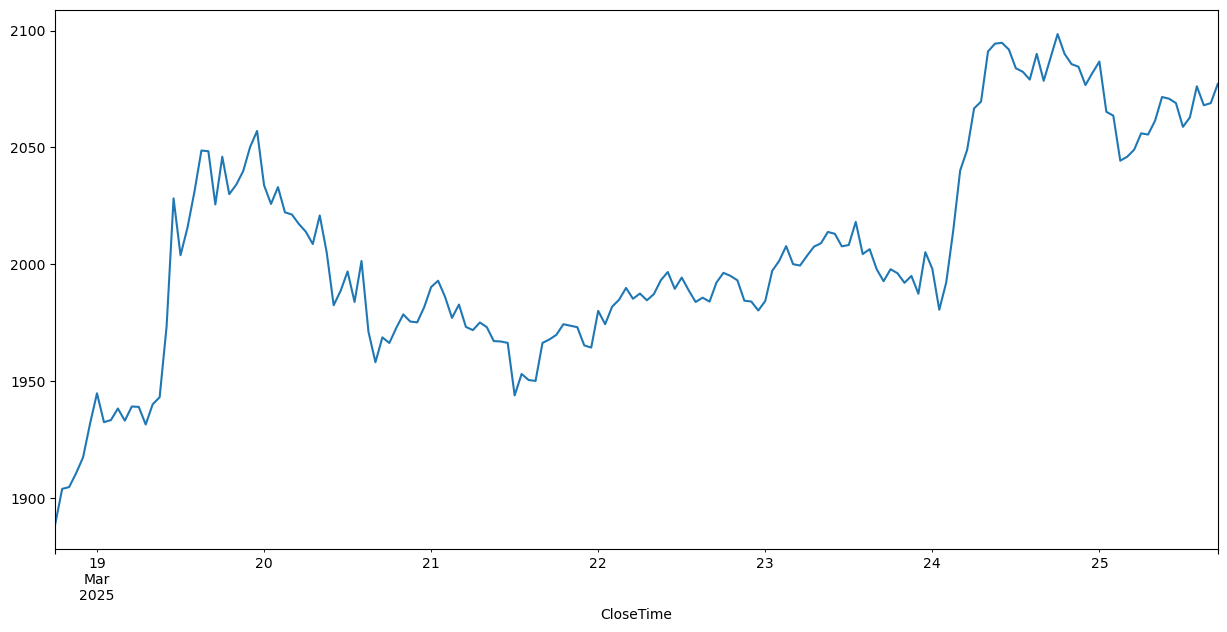

In [40]:
eth["ClosePrice"].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Lab.

In [41]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-03-18 18:00:00,1876.05,1890.93,1874.00,1888.74,355.347776
2025-03-18 19:00:00,1888.74,1907.67,1888.02,1903.80,192.804989
2025-03-18 20:00:00,1903.82,1908.70,1898.29,1904.56,387.390842
2025-03-18 21:00:00,1904.79,1914.20,1904.79,1910.50,1363.996319
2025-03-18 22:00:00,1910.50,1918.99,1908.76,1917.28,386.354418


### Dynamic plots with Bokeh

We've also included [Bokeh](https://docs.bokeh.org/en/latest/) as part of this main distribution. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [42]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [43]:
output_notebook()

Loading BokehJS ...

And we generate the plot:

In [44]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Price"

p1.line(btc.index, btc["ClosePrice"], color="blue", legend_label="Bitcoin")
# p1.line(eth.index, eth["ClosePrice"], color="red", legend_label="Ethereum")

p1.legend.location = "top_left"

show(p1)

### How to use a Jupyter - Exporting to Excel

We're now ready to generate an `Excel` file from the downloaded prices. Working with Excel and other formats (like `CSV` or `JSON`) is extremely simple in Jupyter Lab (thanks to pandas and Python). Our first step will be to create an "Excel writer", a component from the `pandas` package:


In [45]:
writer = pd.ExcelWriter("data/cryptos.xlsx")

We'll now write both our Bitcoin and Ether data as separate sheets:

In [46]:
btc.to_excel(writer, sheet_name="Bitcoin")

In [47]:
eth.to_excel(writer, sheet_name="Ether")

And finally, we can save the file:

In [48]:
writer.close()